# College Basketball Using Clustering
### Applying concepts in Math 118 to CBB

### Loading in and Cleaning Data

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
data = pd.read_csv("alldataclean.csv")

In [2]:
unwanted_data = data[data['CONF'].isin(['Ind', 'ind', 'GWC'])].index
data.drop(unwanted_data, inplace = True)

In [3]:
data['TOURNEY'] = list(map(lambda x: not x, data.POSTSEASON.isnull()))
cat_type = CategoricalDtype(categories=['R68', 'R64', 'R32', 'S16', 'E8', 'F4', '2ND', 'Champions'], ordered=True)
data.POSTSEASON = data.POSTSEASON.astype(cat_type)

## SVD
### Whether a Team Made the Postseason or Not

In [4]:
# Using all numerical data
X = data[["W", "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD", "ORB", "DRB", "FTR", "FTRD", "2P_O",
         "2P_D", "3P_O", "3P_D", "ADJ_T"]]

In [5]:
# Using the tourney column as the target column
y = data[["TOURNEY"]].squeeze()
y.shape

(3151,)

In [6]:
# Normalizing the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [7]:
# Centering the data
mu = np.mean(X,axis = 0, keepdims = True)
X_tilde = X - mu

In [8]:
# SVD
U,S,VT = np.linalg.svd(X_tilde, full_matrices=False)

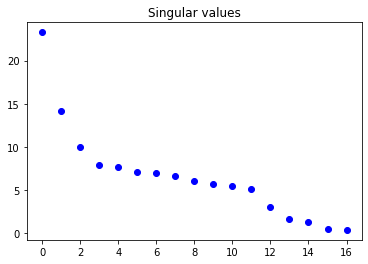

In [9]:
# Plot of the singular values that show most of the variability is in the first 2-3 dimensions
plt.plot(S,'bo')
plt.title('Singular values')
plt.show()

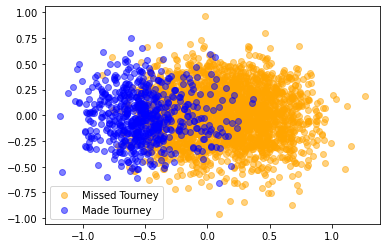

In [10]:
# Plot in 2D
X_2D = np.dot(X_tilde,VT[0:2,:].T)
fig = plt.figure()
colors = ['orange', 'blue']
labels = ["Missed Tourney", "Made Tourney"]
for i in range(0,2):
    plt.scatter(X_2D[:,0][y == i],X_2D[:,1][y == i], color = colors[i], alpha=0.5, label= labels[i])
plt.legend()
plt.show()

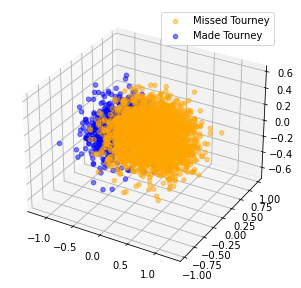

In [11]:
# Plot in 3D
X_3D = X_tilde@VT[0:3,:].T
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
colors = ['orange', 'blue']
labels = ["Missed Tourney", "Made Tourney"]

for i in range(0,2):
    ax.scatter(X_3D[:,0][y == i],X_3D[:,1][y == i],X_3D[:,2][y == i],
                color = colors[i], alpha=0.5, label= labels[i])
plt.legend()
plt.show()

### Success of a Tournament Team

In [13]:
data['F4'] = data.POSTSEASON >= 'F4'
tourney_teams = data[data.TOURNEY == 1]

In [19]:
X1  = tourney_teams[["W", "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD", "ORB", 
        "DRB", "FTR", "FTRD", "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T"]]
y1 = tourney_teams['F4'].squeeze()
y1.shape

(612,)

In [15]:
# Normalizing the data
scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)

In [16]:
# Centering the data
mu1 = np.mean(X1,axis = 0, keepdims = True)
X1_tilde = X1 - mu1

In [17]:
# SVD
U1,S1,VT1 = np.linalg.svd(X1_tilde, full_matrices=False)

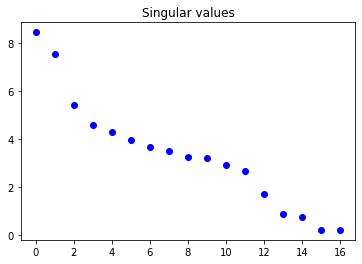

In [18]:
plt.plot(S1,'bo')
plt.title('Singular values')
plt.show()

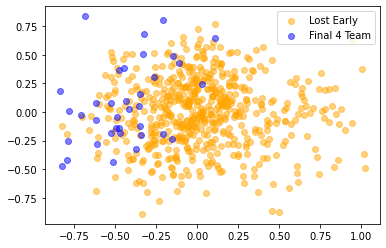

In [20]:
# Plot in 2D
X1_2D = np.dot(X1_tilde,VT1[0:2,:].T)
fig = plt.figure()
colors = ['orange', 'blue']
labels = ["Lost Early", "Final 4 Team"]
for i in range(0,2):
    plt.scatter(X1_2D[:,0][y1 == i],X1_2D[:,1][y1 == i], color = colors[i], alpha=0.5, label= labels[i])
plt.legend()
plt.show()

Final Four Teams do not fit into clusters well in 2D with the statistics in our dataset.

### High Major vs Mid Major

In [21]:
data['Power'] = data.CONF.isin(['ACC', 'B10', 'B12', 'BE', 'P12', 'SEC'])

In [22]:
X = data[["W", "ADJOE", "ADJDE", "BARTHAG", "EFG_O", "EFG_D", "TOR", "TORD", "ORB", "DRB", "FTR", "FTRD", "2P_O",
         "2P_D", "3P_O", "3P_D", "ADJ_T"]]
y = data[["Power"]].squeeze()
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
mu = np.mean(X,axis = 0, keepdims = True)
X_tilde = X - mu
U,S,VT = np.linalg.svd(X_tilde, full_matrices=False)

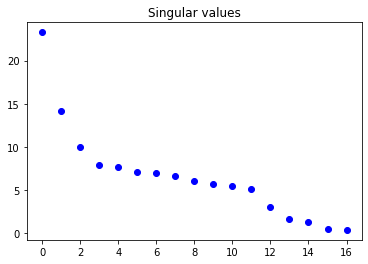

In [23]:
plt.plot(S,'bo')
plt.title('Singular values')
plt.show()

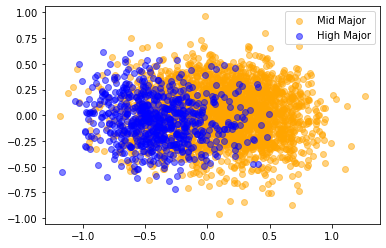

In [24]:
# Plot in 2D
X_2D = np.dot(X_tilde,VT[0:2,:].T)
fig = plt.figure()
colors = ['orange', 'blue']
labels = ["Mid Major", "High Major"]
for i in range(0,2):
    plt.scatter(X_2D[:,0][y == i],X_2D[:,1][y == i], color = colors[i], alpha=0.5, label= labels[i])
plt.legend()
plt.show()